In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [34]:
df = pd.read_csv('final_data.csv')

In [35]:
df.head()

,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,living_area,lot_size,year_built,home_type,home_status,finished_SqFt,total_rooms,neighborhood,zpid
0,630000,57 Sunnyside St,Boston,MA,2136,630000.0,1456383600000,2/25/16,9,4.0,4765,9703,1890,MULTI_FAMILY,SOLD,4765.0,16.0,Hyde Park,59128191
1,685000,26 Crawford St,Boston,MA,2121,685000.0,1511269200000,11/21/17,9,3.0,4760,12632,1900,MULTI_FAMILY,RECENTLY_SOLD,4760.0,15.0,Roxbury,59213256
2,1725000,10 Roanoke Ave,Boston,MA,2130,1725000.0,1533322800000,8/3/18,6,3.0,4757,14374,1852,SINGLE_FAMILY,RECENTLY_SOLD,4757.0,17.0,Jamaica Plain,59133846
3,1365000,723 Washington St,Boston,MA,2111,1365000.0,1485792000000,1/30/17,5,2.5,4726,9147,1925,MULTI_FAMILY,SOLD,4726.0,11.0,Brighton,59096637
4,1950000,154 Moss Hill Rd,Boston,MA,2130,1950000.0,1524250800000,4/20/18,6,4.5,4719,24829,1930,SINGLE_FAMILY,RECENTLY_SOLD,4719.0,11.0,Jamaica Plain,59131319


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 19 columns):
title                 1810 non-null object
address               1810 non-null object
city                  1810 non-null object
state                 1810 non-null object
zipcode               1810 non-null int64
price                 1809 non-null float64
date_sold             1810 non-null int64
readable_date_sold    1810 non-null object
bedrooms              1810 non-null int64
bathrooms             1810 non-null float64
living_area           1810 non-null int64
lot_size              1810 non-null int64
year_built            1810 non-null int64
home_type             1810 non-null object
home_status           1810 non-null object
finished_SqFt         1808 non-null float64
total_rooms           1695 non-null float64
neighborhood          1810 non-null object
zpid                  1810 non-null int64
dtypes: float64(4), int64(7), object(8)
memory usage: 268.8+ KB


In [37]:
# Replace price where is null with 0
df.set_value(df['price'].isnull(),'price',0)

/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,living_area,lot_size,year_built,home_type,home_status,finished_SqFt,total_rooms,neighborhood,zpid
0,630000,57 Sunnyside St,Boston,MA,2136,630000.0,1456383600000,2/25/16,9,4.0,4765,9703,1890,MULTI_FAMILY,SOLD,4765.0,16.0,Hyde Park,59128191
1,685000,26 Crawford St,Boston,MA,2121,685000.0,1511269200000,11/21/17,9,3.0,4760,12632,1900,MULTI_FAMILY,RECENTLY_SOLD,4760.0,15.0,Roxbury,59213256
2,1725000,10 Roanoke Ave,Boston,MA,2130,1725000.0,1533322800000,8/3/18,6,3.0,4757,14374,1852,SINGLE_FAMILY,RECENTLY_SOLD,4757.0,17.0,Jamaica Plain,59133846
3,1365000,723 Washington St,Boston,MA,2111,1365000.0,1485792000000,1/30/17,5,2.5,4726,9147,1925,MULTI_FAMILY,SOLD,4726.0,11.0,Brighton,59096637
4,1950000,154 Moss Hill Rd,Boston,MA,2130,1950000.0,1524250800000,4/20/18,6,4.5,4719,24829,1930,SINGLE_FAMILY,RECENTLY_SOLD,4719.0,11.0,Jamaica Plain,59131319
5,550000,128 Hancock St,Boston,MA,2125,550000.0,1463385600000,5/16/16,12,3.0,4716,6265,1905,MULTI_FAMILY,SOLD,4716.0,18.0,North Dorchester,59108569
6,4200000,174 W Canton St,Boston,MA,2116,4200000.0,1450146600000,12/15/15,5,3.0,4710,2184,1866,SINGLE_FAMILY,SOLD,4710.0,15.0,South End,59172624
7,$10.5M,2 Avery St PENTHOUSE 2A,Boston,MA,2111,10500000.0,1518469200000,2/12/18,5,5.5,4703,4703,2000,CONDO,FOR_SALE,4703.0,9.0,Chinatown,61319986
8,1500000,202 Allandale St # B,Boston,MA,2131,1500000.0,1518642000000,2/14/18,4,6.0,4700,1873080,1994,TOWNHOUSE,RECENTLY_SOLD,4700.0,10.0,West Roxbury,59141320
9,4270000,345 Beacon St,Boston,MA,2116,4270000.0,1472842800000,9/2/16,5,4.5,4675,1742,1873,SINGLE_FAMILY,SOLD,4675.0,12.0,Back Bay,59170196


In [38]:
# Drop rows with finished_SqFt having null value
df = df.dropna(subset=['finished_SqFt'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1809
Data columns (total 19 columns):
title                 1808 non-null object
address               1808 non-null object
city                  1808 non-null object
state                 1808 non-null object
zipcode               1808 non-null int64
price                 1808 non-null float64
date_sold             1808 non-null int64
readable_date_sold    1808 non-null object
bedrooms              1808 non-null int64
bathrooms             1808 non-null float64
living_area           1808 non-null int64
lot_size              1808 non-null int64
year_built            1808 non-null int64
home_type             1808 non-null object
home_status           1808 non-null object
finished_SqFt         1808 non-null float64
total_rooms           1695 non-null float64
neighborhood          1808 non-null object
zpid                  1808 non-null int64
dtypes: float64(4), int64(7), object(8)
memory usage: 282.5+ KB


In [40]:
# There are some with missing total rooms
# Fill in missing total rooms
def find_total_rooms(row):
    beds = row['bedrooms']
    baths = row['bathrooms']

    try:
        avg_rooms = int(df[(df['bedrooms'] == beds) & (df['bathrooms'] == baths)]['total_rooms'].mean())
    except:
        avg_rooms = beds + baths

    return avg_rooms
    

for i, row in df[df['total_rooms'].isnull()].iterrows():
    total_rooms = find_total_rooms(row)
    df.set_value(i, 'total_rooms', total_rooms)
    
df.head(40)

/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,living_area,lot_size,year_built,home_type,home_status,finished_SqFt,total_rooms,neighborhood,zpid
0,630000,57 Sunnyside St,Boston,MA,2136,630000.0,1456383600000,2/25/16,9,4.0,4765,9703,1890,MULTI_FAMILY,SOLD,4765.0,16.0,Hyde Park,59128191
1,685000,26 Crawford St,Boston,MA,2121,685000.0,1511269200000,11/21/17,9,3.0,4760,12632,1900,MULTI_FAMILY,RECENTLY_SOLD,4760.0,15.0,Roxbury,59213256
2,1725000,10 Roanoke Ave,Boston,MA,2130,1725000.0,1533322800000,8/3/18,6,3.0,4757,14374,1852,SINGLE_FAMILY,RECENTLY_SOLD,4757.0,17.0,Jamaica Plain,59133846
3,1365000,723 Washington St,Boston,MA,2111,1365000.0,1485792000000,1/30/17,5,2.5,4726,9147,1925,MULTI_FAMILY,SOLD,4726.0,11.0,Brighton,59096637
4,1950000,154 Moss Hill Rd,Boston,MA,2130,1950000.0,1524250800000,4/20/18,6,4.5,4719,24829,1930,SINGLE_FAMILY,RECENTLY_SOLD,4719.0,11.0,Jamaica Plain,59131319
5,550000,128 Hancock St,Boston,MA,2125,550000.0,1463385600000,5/16/16,12,3.0,4716,6265,1905,MULTI_FAMILY,SOLD,4716.0,18.0,North Dorchester,59108569
6,4200000,174 W Canton St,Boston,MA,2116,4200000.0,1450146600000,12/15/15,5,3.0,4710,2184,1866,SINGLE_FAMILY,SOLD,4710.0,15.0,South End,59172624
7,$10.5M,2 Avery St PENTHOUSE 2A,Boston,MA,2111,10500000.0,1518469200000,2/12/18,5,5.5,4703,4703,2000,CONDO,FOR_SALE,4703.0,9.0,Chinatown,61319986
8,1500000,202 Allandale St # B,Boston,MA,2131,1500000.0,1518642000000,2/14/18,4,6.0,4700,1873080,1994,TOWNHOUSE,RECENTLY_SOLD,4700.0,10.0,West Roxbury,59141320
9,4270000,345 Beacon St,Boston,MA,2116,4270000.0,1472842800000,9/2/16,5,4.5,4675,1742,1873,SINGLE_FAMILY,SOLD,4675.0,12.0,Back Bay,59170196


In [41]:
df.describe()

,zipcode,price,date_sold,bedrooms,bathrooms,living_area,lot_size,year_built,finished_SqFt,total_rooms,zpid
count,1808.000000,1.808000e+03,1.808000e+03,1808.000000,1808.000000,1808.000000,1.808000e+03,1808.000000,1808.000000,1808.000000,1.808000e+03
mean,2128.102323,1.194299e+06,1.500789e+12,4.179757,2.578263,2855.347345,1.143588e+06,1922.491150,2837.964049,9.004425,1.714298e+08
std,30.826631,1.504733e+06,2.955322e+10,2.837860,1.443393,6024.855684,1.035256e+07,45.728354,6021.145151,5.120759,4.420650e+08
min,2108.000000,0.000000e+00,1.445497e+12,0.000000,1.000000,212.000000,8.700000e+01,1700.000000,212.000000,1.000000,5.631552e+07
25%,2118.000000,4.600000e+05,1.473263e+12,2.000000,1.000000,1122.000000,1.494250e+03,1899.000000,1109.000000,5.000000,5.912410e+07
50%,2125.000000,6.800000e+05,1.501750e+12,3.000000,2.500000,2291.000000,3.374000e+03,1905.000000,2270.000000,8.000000,5.916770e+07
75%,2130.000000,1.275000e+06,1.531249e+12,6.000000,3.000000,3595.750000,8.276000e+03,1935.250000,3580.500000,13.000000,6.709483e+07
max,2467.000000,2.100000e+07,1.539803e+12,21.000000,18.000000,143027.000000,1.897474e+08,2018.000000,143027.000000,39.000000,2.145028e+09


In [42]:
df.columns

Index(['title', 'address', 'city', 'state', 'zipcode', 'price', 'date_sold',
       'readable_date_sold', 'bedrooms', 'bathrooms', 'living_area',
       'lot_size', 'year_built', 'home_type', 'home_status', 'finished_SqFt',
       'total_rooms', 'neighborhood', 'zpid'],
      dtype='object')

In [43]:
# convert to datetime format
df['readable_date_sold'] = pd.to_datetime(df['readable_date_sold'])
df['year_built'] = pd.to_datetime(df['year_built'], format='%Y').dt.year
df['DATE'] = pd.to_datetime(df['readable_date_sold'].apply(lambda x: x.replace(day=1)).dt.date)

/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [44]:
# Create additional features
def zipcode(x):
    return str(x).zfill(5)

df['zipcode'] = df['zipcode'].apply(zipcode)


/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
# bathroom / bedroom
df['bed_bath'] = df['bedrooms']/df['bathrooms']

# lot size / finished_SqFt
df['lot_finish'] = df['lot_size'] / df['finished_SqFt']

# how old the house is
df['age'] = df['readable_date_sold'].dt.year - df['year_built']

# price per finished_SqFt
df['p_sqft'] = df['price'] / df['finished_SqFt']

# finished_SqFt / total rooms
df['finishedsqft_rooms'] = df['finished_SqFt'] / df['total_rooms']
df.head()

/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tara/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,...,finished_SqFt,total_rooms,neighborhood,zpid,DATE,bed_bath,lot_finish,age,p_sqft,finishedsqft_rooms
0,630000,57 Sunnyside St,Boston,MA,02136,630000.0,1456383600000,2016-02-25,9,4.0,...,4765.0,16.0,Hyde Park,59128191,2016-02-01,2.250000,2.036306,126,132.214061,297.812500
1,685000,26 Crawford St,Boston,MA,02121,685000.0,1511269200000,2017-11-21,9,3.0,...,4760.0,15.0,Roxbury,59213256,2017-11-01,3.000000,2.653782,117,143.907563,317.333333
2,1725000,10 Roanoke Ave,Boston,MA,02130,1725000.0,1533322800000,2018-08-03,6,3.0,...,4757.0,17.0,Jamaica Plain,59133846,2018-08-01,2.000000,3.021652,166,362.623502,279.823529
3,1365000,723 Washington St,Boston,MA,02111,1365000.0,1485792000000,2017-01-30,5,2.5,...,4726.0,11.0,Brighton,59096637,2017-01-01,2.000000,1.935463,92,288.827761,429.636364
4,1950000,154 Moss Hill Rd,Boston,MA,02130,1950000.0,1524250800000,2018-04-20,6,4.5,...,4719.0,11.0,Jamaica Plain,59131319,2018-04-01,1.333333,5.261496,88,413.223140,429.000000


In [46]:
# Read the house price index
dateparse = lambda dates: pd.to_datetime(dates)
index_df = pd.read_csv('final_hpi.csv',parse_dates=['DATE'], date_parser=dateparse)

index_df.head()

,DATE,index
0,1987-01-01,70.266973
1,1987-02-01,70.640678
2,1987-03-01,71.046774
3,1987-04-01,71.411571
4,1987-05-01,71.882711


In [47]:
index_df.dtypes

DATE     datetime64[ns]
index           float64
dtype: object

In [48]:
# Join house price index to df based on month
df = pd.merge(df, index_df, on='DATE')

In [49]:
df.head()

,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,...,total_rooms,neighborhood,zpid,DATE,bed_bath,lot_finish,age,p_sqft,finishedsqft_rooms,index
0,630000,57 Sunnyside St,Boston,MA,02136,630000.0,1456383600000,2016-02-25,9,4.0,...,16.0,Hyde Park,59128191,2016-02-01,2.250000,2.036306,126,132.214061,297.812500,185.020374
1,599000,29 Tremlett St,Boston,MA,02124,599000.0,1454310000000,2016-02-01,6,3.0,...,15.0,South Dorchester,59107688,2016-02-01,2.000000,0.696667,106,153.589744,260.000000,185.020374
2,550000,59 Armandine St,Dorchester Center,MA,02124,550000.0,1456729200000,2016-02-29,10,7.0,...,17.0,South Dorchester,2128902346,2016-02-01,1.428571,0.967778,96,152.777778,211.764706,185.020374
3,1321000,27 Shannon St,Boston,MA,02135,1321000.0,1456210800000,2016-02-23,6,5.0,...,11.0,Brighton,2122347365,2016-02-01,1.200000,1.351724,86,455.517241,263.636364,185.020374
4,1788000,103 Myrtle St,Boston,MA,02114,1788000.0,1455865200000,2016-02-19,3,4.0,...,10.0,Beacon Hill,59173626,2016-02-01,0.750000,0.281250,126,745.000000,240.000000,185.020374


In [50]:
# Adjust price to 2018-07 (213.806) and create more features

df['adjusted_price'] = (df['price'] / df['index']) * 213.806
df['adj_p_sqft'] = df['adjusted_price'] / df['finished_SqFt']

# Normalized price
df['adj_price_m'] = df['adjusted_price'] / 1000000.0


In [51]:
df.head()

,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,...,DATE,bed_bath,lot_finish,age,p_sqft,finishedsqft_rooms,index,adjusted_price,adj_p_sqft,adj_price_m
0,630000,57 Sunnyside St,Boston,MA,02136,630000.0,1456383600000,2016-02-25,9,4.0,...,2016-02-01,2.250000,2.036306,126,132.214061,297.812500,185.020374,7.280159e+05,152.784036,0.728016
1,599000,29 Tremlett St,Boston,MA,02124,599000.0,1454310000000,2016-02-01,6,3.0,...,2016-02-01,2.000000,0.696667,106,153.589744,260.000000,185.020374,6.921929e+05,177.485366,0.692193
2,550000,59 Armandine St,Dorchester Center,MA,02124,550000.0,1456729200000,2016-02-29,10,7.0,...,2016-02-01,1.428571,0.967778,96,152.777778,211.764706,185.020374,6.355695e+05,176.547073,0.635569
3,1321000,27 Shannon St,Boston,MA,02135,1321000.0,1456210800000,2016-02-23,6,5.0,...,2016-02-01,1.200000,1.351724,86,455.517241,263.636364,185.020374,1.526522e+06,526.386999,1.526522
4,1788000,103 Myrtle St,Boston,MA,02114,1788000.0,1455865200000,2016-02-19,3,4.0,...,2016-02-01,0.750000,0.281250,126,745.000000,240.000000,185.020374,2.066179e+06,860.907729,2.066179


In [119]:
df.groupby('neighborhood').count()

,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,...,DATE,bed_bath,lot_finish,age,p_sqft,finishedsqft_rooms,index,adjusted_price,adj_p_sqft,adj_price_m
neighborhood,,,,,,,,,,,,,,,,,,,,,
Allston,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Back Bay,213,213,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
Bay Village,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Beacon Hill,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Brighton,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
Charlestown,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
Chinatown,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
Downtown,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Downtown Crossing,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [52]:
# Location is important factor contributing to price but user will not know longtitude and latitude
# so using neighborhood can also determine the location
#
# Cluster neighborhoods instead of creating dummies for all neighborhoods 
# since there are neighborhoods having with only 1 transaction activity
# 
# Group determined by how frequence of transactions in the area and avg adjusted price per sqft

# freq = total sales in the neighborhood
freq = df.groupby('neighborhood').count()['address']

# mean_price = average adjusted price per sqft
mean_price = df.groupby('neighborhood').mean()['adj_p_sqft']

# create cluster dataframe
cluster = pd.concat([freq, mean_price], axis=1)
cluster['neighborhood'] = cluster.index

cluster.columns = ['freq', 'adj_p_sqft', 'neighborhood']

In [53]:
cluster.describe()

,freq,adj_p_sqft
count,27.000000,27.000000
mean,66.962963,676.506686
std,60.475349,485.834265
min,1.000000,101.622816
25%,15.000000,312.419458
50%,61.000000,463.708914
75%,105.500000,1035.352872
max,213.000000,1836.015448


In [121]:
cluster.to_csv('cluster.csv')

Inputs for Clustering

Variables:	Sum of Adj P Sqft
Sum of Freq
Level of Detail:	Not Aggregated
Scaling:	Normalized


Summary Diagnostics

Number of Clusters:	3
Number of Points:	27
Between-group Sum of Squares:	2.5857
Within-group Sum of Squares:	1.5701
Total Sum of Squares:	4.1558


								Centers								
Clusters					Number of Items			Sum of Adj P Sqft				Sum of Freq				
Cluster 1					13			883.25				17.154				
Cluster 2					2			1356.0				183.5				
Cluster 3					12			339.29				101.5				
Not Clustered					0	


In [63]:
# Cluster the neighborhood into three groups: 
# 1. Low frequency
# 2. High price, High frequency
# 3. Low price, High frequency

# Low frequency
cluster1 = cluster[cluster['freq'] < 61]
cluster1.index

Index(['Allston', 'Bay Village', 'Beacon Hill', 'Chinatown', 'Downtown',
       'Downtown Crossing', 'Fenway', 'Kenmore', 'Leather District',
       'Mission Hill', 'North End', 'West End', 'Winthrop'],
      dtype='object', name='neighborhood')

In [64]:
# Low price, High frequency
cluster_temp = cluster[cluster['adj_p_sqft'] <= 749]
cluster2 = cluster_temp[cluster_temp['freq'] >= 61]
cluster2.index

Index(['Brighton', 'Charlestown', 'East Boston', 'Hyde Park', 'Jamaica Plain',
       'Mattapan', 'North Dorchester', 'Roslindale', 'Roxbury', 'South Boston',
       'South Dorchester', 'West Roxbury'],
      dtype='object', name='neighborhood')

In [65]:
# High price, High frequency
cluster_temp = cluster[cluster['adj_p_sqft'] > 749]
cluster3 = cluster_temp[cluster_temp.freq >= 61]
cluster3.index

Index(['Back Bay', 'South End'], dtype='object', name='neighborhood')

Text(0,0.5,'Average Adj Price per SqFt')

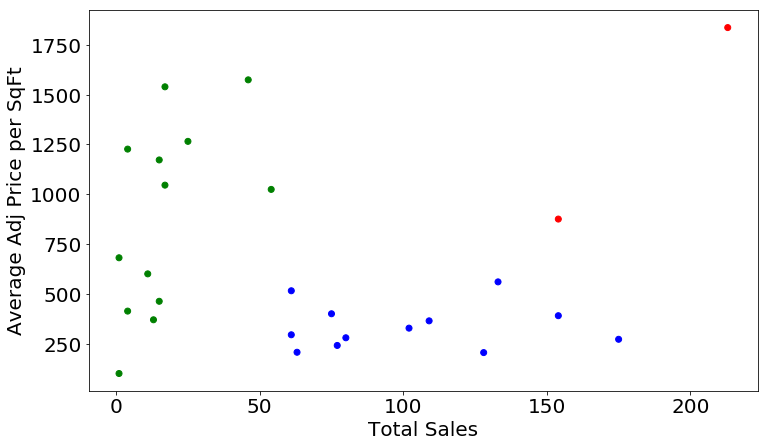

In [66]:
# Plot cluster
def get_color(x):
    if x in cluster1.index:
        return 'green'
    elif x in cluster2.index:
        return 'blue'
    else:
        return 'red'
    
cluster['color'] = cluster['neighborhood'].apply(get_color) 

fix, ax = plt.subplots(figsize=(12, 7))
ax.scatter(cluster['freq'], cluster['adj_p_sqft'], c=cluster['color'])
ax.axes.tick_params(labelsize=20)
ax.set_xlabel('Total Sales', size=20)
ax.set_ylabel('Average Adj Price per SqFt', size=20)

In [67]:
# Add group index to df based on the neighborhood clusters
def get_group(x):
    if x in cluster1.index:
        return 'low_freq'
    elif x in cluster2.index:
        return 'low_price_high_freq'
    else:
        return 'high_price_high_freq'
    
df['group'] = df['neighborhood'].apply(get_group)

In [68]:
df.head()

,title,address,city,state,zipcode,price,date_sold,readable_date_sold,bedrooms,bathrooms,...,bed_bath,lot_finish,age,p_sqft,finishedsqft_rooms,index,adjusted_price,adj_p_sqft,adj_price_m,group
0,630000,57 Sunnyside St,Boston,MA,02136,630000.0,1456383600000,2016-02-25,9,4.0,...,2.250000,2.036306,126,132.214061,297.812500,185.020374,7.280159e+05,152.784036,0.728016,low_price_high_freq
1,599000,29 Tremlett St,Boston,MA,02124,599000.0,1454310000000,2016-02-01,6,3.0,...,2.000000,0.696667,106,153.589744,260.000000,185.020374,6.921929e+05,177.485366,0.692193,low_price_high_freq
2,550000,59 Armandine St,Dorchester Center,MA,02124,550000.0,1456729200000,2016-02-29,10,7.0,...,1.428571,0.967778,96,152.777778,211.764706,185.020374,6.355695e+05,176.547073,0.635569,low_price_high_freq
3,1321000,27 Shannon St,Boston,MA,02135,1321000.0,1456210800000,2016-02-23,6,5.0,...,1.200000,1.351724,86,455.517241,263.636364,185.020374,1.526522e+06,526.386999,1.526522,low_price_high_freq
4,1788000,103 Myrtle St,Boston,MA,02114,1788000.0,1455865200000,2016-02-19,3,4.0,...,0.750000,0.281250,126,745.000000,240.000000,185.020374,2.066179e+06,860.907729,2.066179,low_freq


Text(0,0.5,'Living Area')

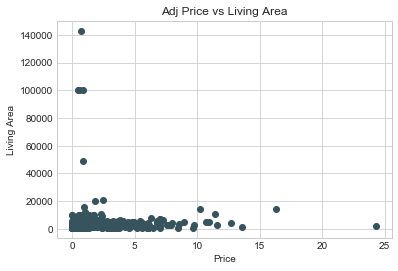

In [128]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
plt.scatter(df['adj_price_m'], df['living_area'])
plt.title('Adj Price vs Living Area')
plt.xlabel('Price')
plt.ylabel('Living Area')

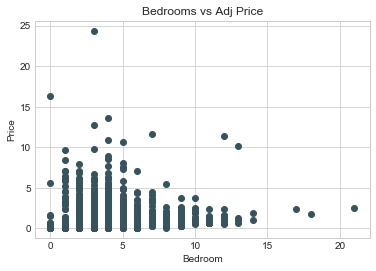

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [129]:
plt.scatter(df['bedrooms'], df['adj_price_m'])
plt.title('Bedrooms vs Adj Price')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()
sns.despine

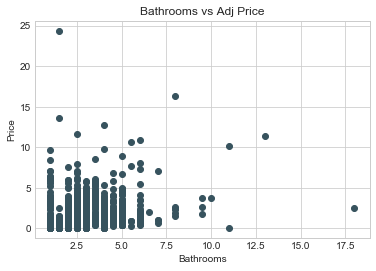

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [130]:
plt.scatter(df['bathrooms'], df['adj_price_m'])
plt.title('Bathrooms vs Adj Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
sns.despine

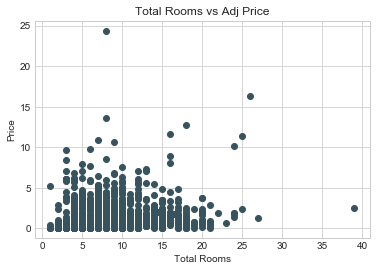

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [131]:
plt.scatter(df['total_rooms'], df['adj_price_m'])
plt.title('Total Rooms vs Adj Price')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.show()
sns.despine

Text(0.5,1,'Which is the pricey location by zipcode?')

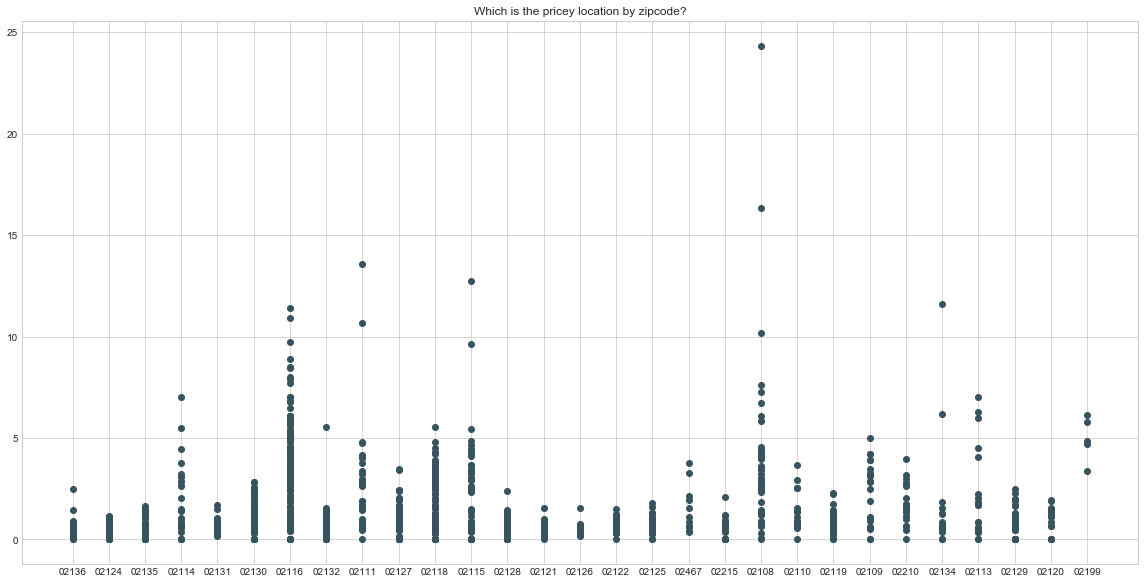

In [132]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(df['zipcode'], df['adj_price_m'])
plt.title('Which is the pricey location by zipcode?')

/Users/tara/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25b0aba8>,
      dtype=object)

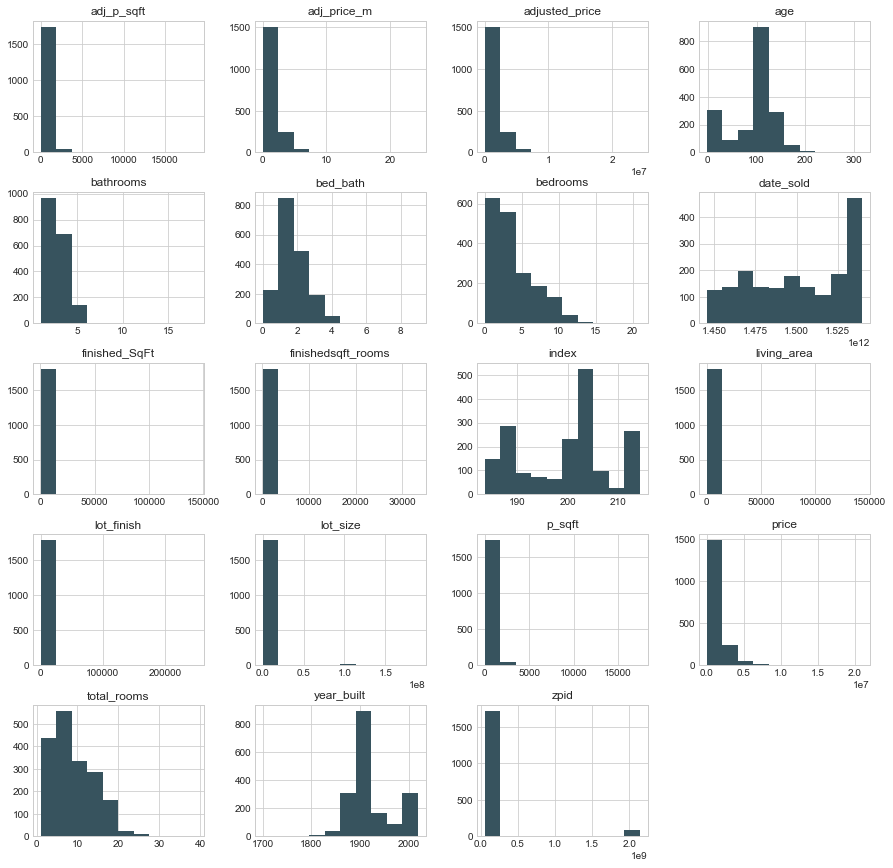

In [133]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
df.hist(ax=ax, stacked = True)

In [134]:
df.describe()

,price,date_sold,bedrooms,bathrooms,living_area,lot_size,year_built,finished_SqFt,total_rooms,zpid,bed_bath,lot_finish,age,p_sqft,finishedsqft_rooms,index,adjusted_price,adj_p_sqft,adj_price_m
count,1.808000e+03,1.808000e+03,1808.000000,1808.000000,1808.000000,1.808000e+03,1808.000000,1808.000000,1808.000000,1.808000e+03,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1808.000000,1.808000e+03,1808.000000,1808.000000
mean,1.194299e+06,1.500789e+12,4.179757,2.578263,2855.347345,1.143588e+06,1922.491150,2837.964049,9.004425,1.714298e+08,1.668302,1257.004978,94.527655,614.249187,360.003094,199.596510,1.279960e+06,657.649370,1.279960
std,1.504733e+06,2.955322e+10,2.837860,1.443393,6024.855684,1.035256e+07,45.728354,6021.145151,5.120759,4.420650e+08,0.859790,11645.566473,45.687266,1065.957365,1331.647225,9.048049,1.631404e+06,1158.126942,1.631404
min,0.000000e+00,1.445497e+12,0.000000,1.000000,212.000000,8.700000e+01,1700.000000,212.000000,1.000000,5.631552e+07,0.000000,0.004350,-2.000000,0.000000,47.000000,183.567531,0.000000e+00,0.000000,0.000000
25%,4.600000e+05,1.473263e+12,2.000000,1.000000,1122.000000,1.494250e+03,1899.000000,1109.000000,5.000000,5.912410e+07,1.000000,1.000000,81.000000,169.113369,209.038235,190.224434,4.940205e+05,183.193054,0.494020
50%,6.800000e+05,1.501750e+12,3.000000,2.500000,2291.000000,3.374000e+03,1905.000000,2270.000000,8.000000,5.916770e+07,1.500000,1.000000,111.000000,339.077295,253.416667,202.428529,7.266725e+05,364.755960,0.726673
75%,1.275000e+06,1.531249e+12,6.000000,3.000000,3595.750000,8.276000e+03,1935.250000,3580.500000,13.000000,6.709483e+07,2.000000,2.983035,118.000000,768.462222,319.931818,204.034962,1.350603e+06,823.171404,1.350603
max,2.100000e+07,1.539803e+12,21.000000,18.000000,143027.000000,1.897474e+08,2018.000000,143027.000000,39.000000,2.145028e+09,9.000000,250000.000000,316.000000,17475.728155,33333.000000,214.250824,2.435041e+07,18711.011357,24.350414


In [69]:
cols = list(df.columns.values) # Make a list of all of the columns in the df
cols.pop(cols.index('zpid')) # Remove zpid from list
df = df[cols+['zpid']] # Put zpid to last column of the df

In [70]:
df.to_csv('all_types.csv')

In [3]:
all_df = pd.read_csv('all_types.csv')
all_df.head()
print(all_df.dtypes)

Unnamed: 0              int64
title                  object
address                object
city                   object
state                  object
zipcode                 int64
price                 float64
date_sold               int64
readable_date_sold     object
bedrooms                int64
bathrooms             float64
living_area             int64
lot_size                int64
year_built              int64
home_type              object
home_status            object
finished_SqFt         float64
total_rooms           float64
neighborhood           object
DATE                   object
bed_bath              float64
lot_finish            float64
age                     int64
p_sqft                float64
finishedsqft_rooms    float64
index                 float64
adjusted_price        float64
adj_p_sqft            float64
adj_price_m           float64
group                  object
zpid                    int64
dtype: object


In [4]:
len(all_df.index)

1808

Index(['adj_price_m', 'bathrooms', 'bedrooms', 'total_rooms', 'lot_size',
       'bed_bath', 'finished_SqFt', 'age', 'finishedsqft_rooms'],
      dtype='object')


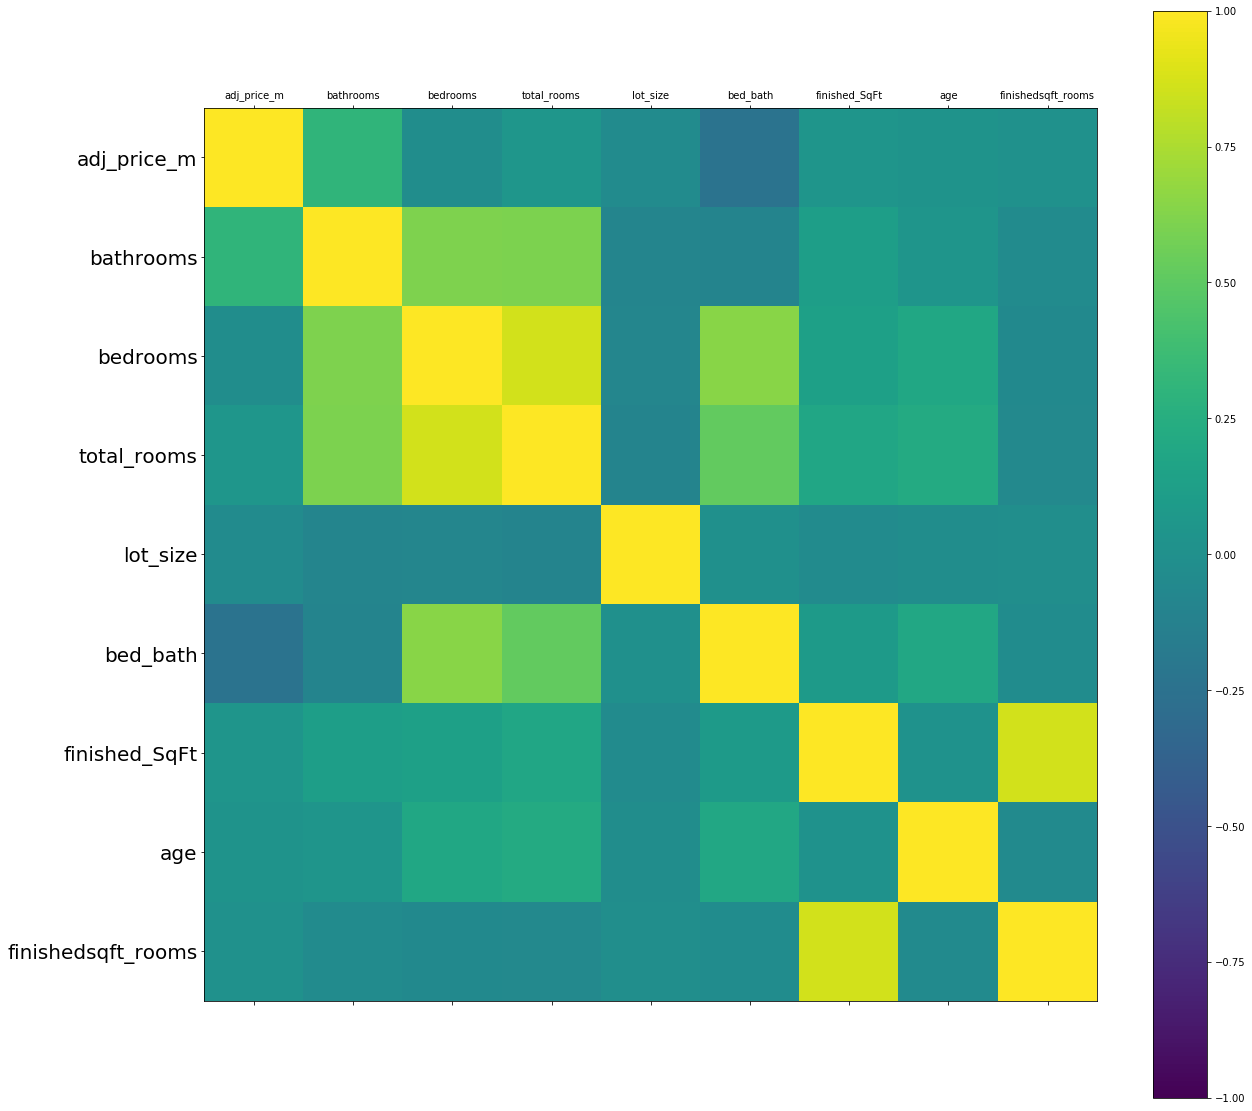

In [9]:
# Check correlations
correlations = all_df[['adj_price_m','bathrooms','bedrooms','total_rooms','lot_size','bed_bath','finished_SqFt','age',
      'finishedsqft_rooms']].corr()
names = all_df[['adj_price_m','bathrooms','bedrooms','total_rooms','lot_size','bed_bath','finished_SqFt','age',
      'finishedsqft_rooms']].keys()
print(names)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names,size=20)
plt.show()

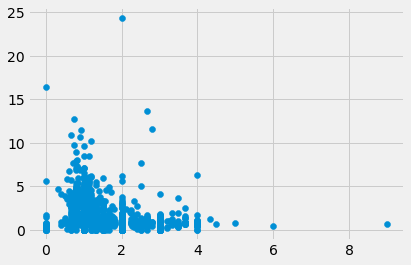

In [98]:
plt.scatter(all_df['bed_bath'], all_df['adj_price_m'])

In [72]:
# Training all dataset
y = all_df['adj_price_m']
X = all_df[['bathrooms','bedrooms','finished_SqFt','total_rooms','finishedsqft_rooms','bed_bath','age','lot_size',
        'lot_finish']]

# Create dummies for groups and home types
group = pd.get_dummies(all_df['group'])
home_type = pd.get_dummies(all_df['home_type'])

X = pd.concat([X,group,home_type],axis=1)

X.head()

,bathrooms,bedrooms,finished_SqFt,total_rooms,finishedsqft_rooms,bed_bath,age,lot_size,lot_finish,high_price_high_freq,low_freq,low_price_high_freq,APARTMENT,CONDO,MULTI_FAMILY,SINGLE_FAMILY,TOWNHOUSE
0,4.0,9,4765.0,16.0,297.812500,2.250000,126,9703,2.036306,0,0,1,0,0,1,0,0
1,3.0,6,3900.0,15.0,260.000000,2.000000,106,2717,0.696667,0,0,1,0,0,0,1,0
2,7.0,10,3600.0,17.0,211.764706,1.428571,96,3484,0.967778,0,0,1,0,0,1,0,0
3,5.0,6,2900.0,11.0,263.636364,1.200000,86,3920,1.351724,0,0,1,0,0,1,0,0
4,4.0,3,2400.0,10.0,240.000000,0.750000,126,675,0.281250,0,1,0,0,0,1,0,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

0.15727270404491064
Linear Regression R squared": -1.1774
Linear Regression RMSE: 2.6882
Linear Regression MAE: 0.9434


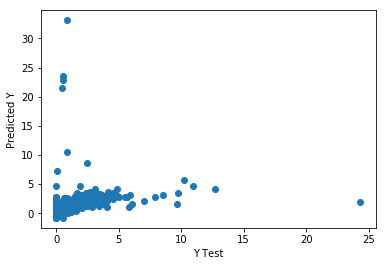

In [81]:
# Linear Regression
lm = LinearRegression()

lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print(np.mean(cross_val_score(lm, X_train.iloc[:,:-1], y_train)))

# Calculate R squared
# -117% of the variability in Y can be explained using X
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))

# Calculate root-mean-square error (RMSE)
# The model was able to predict the value of every house in the test set within $2,688,200 of the real price
lin_mse = mean_squared_error(predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# Calculate mean absolute error (MAE)
lin_mae = mean_absolute_error(predictions, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

In [82]:
# Regression tree
# The depth of the tree is choosen by cross validation
score = []
for i in range(1,15):
    dt = DecisionTreeRegressor(max_depth=i)
    score += [np.mean(cross_val_score(dt, X_train.iloc[:,:-1], y_train))]

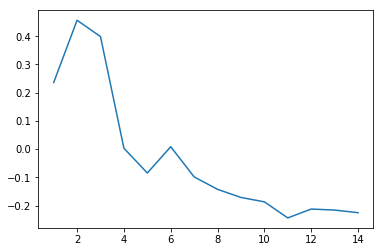

In [83]:
plt.plot(range(1,15),score)

In [90]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train,y_train)

predictions = dt.predict(X_test)
np.mean(cross_val_score(dt, X_train.iloc[:,:-1], y_train))

# Calculate R squared
print('Decision Tree Regression R squared": %.4f' % dt.score(X_test, y_test))

# Calculate root-mean-square error (RMSE)
lin_mse = mean_squared_error(predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Decision Tree Regression RMSE: %.4f' % lin_rmse)

# Calculate mean absolute error (MAE)
lin_mae = mean_absolute_error(predictions, y_test)
print('Decision Tree Regression MAE: %.4f' % lin_mae)

Decision Tree Regression R squared": 0.3380
Decision Tree Regression RMSE: 1.4822
Decision Tree Regression MAE: 0.6678


In [87]:
# Randomforest regression
# For different number of trees, test different depth
num_trees = [10,20,40,100]
d_score = {}
for e in num_trees:
    for i in range(1,15):
        rf = RandomForestRegressor(n_estimators=e, max_depth=i)
        if e in d_score:
            d_score[e] += [np.mean(cross_val_score(rf, X_train.iloc[:,:-1], y_train))]
        else:
            d_score[e] = [np.mean(cross_val_score(rf, X_train.iloc[:,:-1], y_train))]

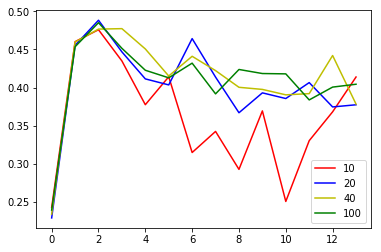

In [88]:
pd.DataFrame(d_score).plot(style=['r', 'b', 'y', 'g'])

In [91]:
rf = RandomForestRegressor(n_estimators=20, max_depth=3)

rf.fit(X_train,y_train)

predictions = rf.predict(X_test)
np.mean(cross_val_score(rf, X_train.iloc[:,:-1], y_train))

# Calculate R squared
print('Random Forest Regression R squared": %.4f' % rf.score(X_test, y_test))

# Calculate root-mean-square error (RMSE)
lin_mse = mean_squared_error(predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Random Forest Regression RMSE: %.4f' % lin_rmse)

# Calculate mean absolute error (MAE)
lin_mae = mean_absolute_error(predictions, y_test)
print('Random Forest Regression MAE: %.4f' % lin_mae)

Random Forest Regression R squared": 0.3177
Random Forest Regression RMSE: 1.5048
Random Forest Regression MAE: 0.6525


In [103]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

gbr = ensemble.GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
np.mean(cross_val_score(gbr, X_train.iloc[:,:-1], y_train))

# Calculate R squared
print('Gradient Boosting Regression R squared": %.4f' % gbr.score(X_test, y_test))

# Calculate root-mean-square error (RMSE)
lin_mse = mean_squared_error(predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Gradient Boosting Regression RMSE: %.4f' % lin_rmse)

# Calculate mean absolute error (MAE)
lin_mae = mean_absolute_error(predictions, y_test)
print('Gradient Boosting Regression MAE: %.4f' % lin_mae)



Gradient Boosting Regression R squared": 0.3074
Gradient Boosting Regression RMSE: 1.5161
Gradient Boosting Regression MAE: 0.6233


In [93]:
# Find out which features are important
# The most important features are finished sqft per room, finished sqft, total rooms, 
# lot size and so on. And the least important feature is Townhouse, which means that regardless of whether this unit is townhouse or not
feature_labels = np.array(['bathrooms','bedrooms','finished_SqFt','total_rooms','finishedsqft_rooms','bed_bath','age','lot_size',
        'lot_finish','high_price_high_freq','low_freq','low_price_high_freq','APARTMENT','CONDO','MULTI_FAMILY','SINGLE_FAMILY','TOWNHOUSE'])
importance = gbr.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

TOWNHOUSE-0.00%
SINGLE_FAMILY-0.31%
APARTMENT-1.07%
MULTI_FAMILY-1.66%
bedrooms-2.17%
CONDO-2.36%
high_price_high_freq-2.56%
low_freq-3.36%
bed_bath-3.82%
bathrooms-6.24%
age-6.35%
lot_finish-7.76%
low_price_high_freq-7.83%
lot_size-9.40%
total_rooms-9.59%
finished_SqFt-12.03%
finishedsqft_rooms-23.51%


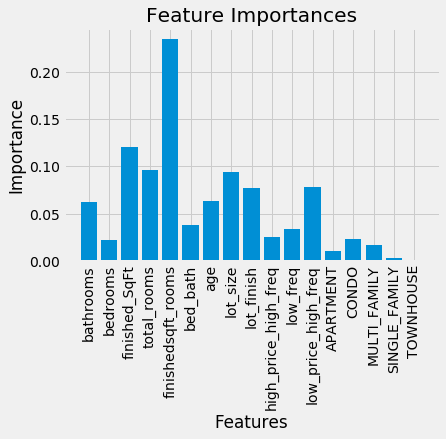

In [95]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Feature Importances');